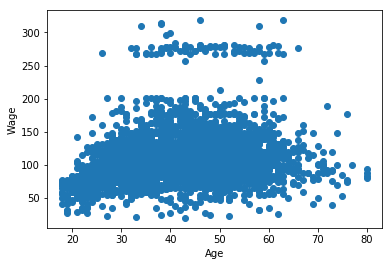

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

file_path = 'Wage.csv'
df = pd.read_csv(file_path)

# sort values by age for plotting
df = df.sort_values(by=["age"])

# Experiment 1
def show_scatter(df):
    plt.scatter(df.age, df.wage, label='Data')
    plt.xlabel('Age')
    plt.ylabel('Wage')
    
show_scatter(df)

<p> 1. From the above scatter plot, the relationship does not appear to be linear.</p>

In [0]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df.age)
y = pd.DataFrame(df.wage)

# Experiment 2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, shuffle=True)

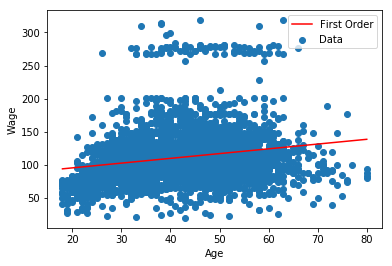

In [3]:
from sklearn.linear_model import LinearRegression

# Experiment 3
lm = LinearRegression().fit(X_train, y_train)
plt.figure(1)
show_scatter(df)

plt.plot(X, lm.predict(X), color='red', label='First Order')
plt.legend()

In [4]:
# Experiment 3
print('First order coefficients:', lm.coef_)
print('R^2 first order: ', lm.score(X_test, y_test))

First order coefficients: [[0.71879604]]
R^2 first order:  0.03445043910588719


<p>4. Our $R^{2}$ value tells us how well our model fits our data. Our value of ~4% (values change each time code is run due to data shuffle) is indicative of a poor fit.</p>

Fourth order coefficients: [[ 0.00000000e+00  2.25716297e+01 -6.24760848e-01  7.89914093e-03
  -3.86043205e-05]]
R^2 fourth order:  0.09582551478266776


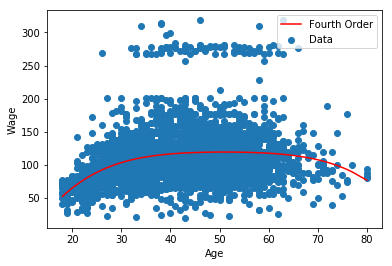

In [5]:
from  sklearn.preprocessing import PolynomialFeatures

# Experiment 5
poly = PolynomialFeatures(4)
X_train_4 = poly.fit_transform(X_train)
lm = lm.fit(X_train_4, y_train)

X_test_4 = poly.fit_transform(X_test)
print('Fourth order coefficients:', lm.coef_)
print('R^2 fourth order: ', lm.score(X_test_4, y_test))

X_4 = poly.fit_transform(X)
fourth_order_pred = lm.predict(X_4)
plt.figure(2)
show_scatter(df)
plt.plot(X, fourth_order_pred, color='red', label='Fourth Order')
plt.legend()

<p>5. From visual inspection this appears to be a better fit than the linear model, an observation that is confirmed by our increased $R^{2}$ value (~9.8%).</p>

Ridge fourth order coefficients: [[ 0.00000000e+00  1.07381041e+00  4.02529150e-03 -3.63754572e-05
  -1.54173848e-06]]
R^2 Ridge fourth order:  0.06214327710830115


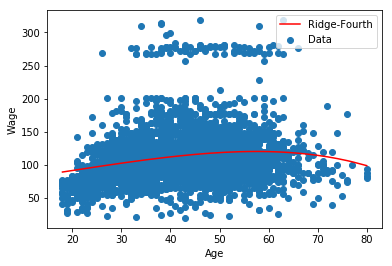

In [6]:
from sklearn.linear_model import Ridge

# Experiment 6
ridge = Ridge(alpha=0.1, normalize=True).fit(X_train_4, y_train)
ridge_4_pred = ridge.predict(X_4)

print('Ridge fourth order coefficients:', ridge.coef_)
print('R^2 Ridge fourth order: ', ridge.score(X_test_4, y_test))

plt.figure(3)
show_scatter(df)
plt.plot(X, ridge_4_pred, color='red', label='Ridge-Fourth')
plt.legend()

<p>6. The graph has been "flattened" considerably compared to the fourth order model without ridge regression.  The coefficients are much smaller compared to the unaltered fourth order model and the $R^{2}$ value has decreased slightly (~7.7%).  The alpha value was applied to normalized data to avoid an ill-conditioned matrix, and as such the alpha value of 0.1 is likely higher than optimal.</p>

Fourth order RidgeCV coefficients [[ 0.00000000e+00  1.98792124e+01 -5.29719731e-01  6.48710766e-03
  -3.11139836e-05]]
R^2 fourth order RidgeCV:  0.0962058653387986
Ridge_cv alpha:  1e-06


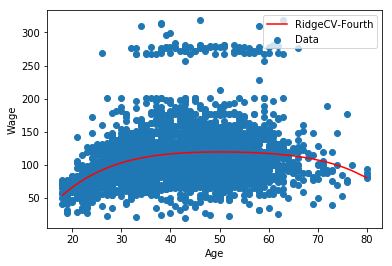

In [7]:
from sklearn.linear_model import RidgeCV

# Experiment 7 - added alpha values below .001 due to normalization
ridge_cv = RidgeCV(alphas=[1e-07, 1e-06, 1e-05, 1e-04, 0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0],
                normalize=True).fit(X_train_4, y_train)

ridge_4_cv_pred = ridge_cv.predict(X_4)

print('Fourth order RidgeCV coefficients', ridge_cv.coef_)
print('R^2 fourth order RidgeCV: ', ridge_cv.score(X_test_4, y_test))
print('Ridge_cv alpha: ', ridge_cv.alpha_)

plt.figure(4)
show_scatter(df)
plt.plot(X, ridge_4_cv_pred, color='red', label='RidgeCV-Fourth')
plt.legend()

<p>7. This model appears similar to the fourth order model without ridge regression.  The RidgeCV fit chose an alpha value of 1e-06.  This is smaller than the suggested values as the RidgeCV fit was applied to normalized data.  The RidgeCV fit led to an increased $R^{2}$ value (~9.8%) when compared to both the regular fourth order model and the model using an alpha value of 0.1.</p>

In [8]:
# Experiment 8

X = df.drop(columns=['Unnamed: 0', 'jobclass', 'region', 'logwage', 'wage'])
y = df.wage

def to_categorical(df):
    '''returns a new pd DataFrame with categorical data
    separated into columns of binary values'''
    dfc = pd.DataFrame(df)
    for column in dfc.columns:
        if dfc[column].dtype == object:
            dummyCols = pd.get_dummies(dfc[column])
            dfc = dfc.join(dummyCols)
            del dfc[column]
    return dfc

# one-hot encode categorical data
X = to_categorical(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

lm = LinearRegression().fit(X_train, y_train)
coefs = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=["Feature", "Coefficient"])
print(coefs)

               Feature  Coefficient
0                 year     1.258063
1                  age     0.288361
2     1. Never Married    -6.742829
3           2. Married     9.987358
4           3. Widowed    -4.274699
5          4. Divorced    -4.222110
6         5. Separated     5.252281
7             1. White     2.955271
8             2. Black    -0.778930
9             3. Asian    -0.584613
10            4. Other    -1.591728
11        1. < HS Grad   -23.386350
12          2. HS Grad   -15.607463
13     3. Some College    -4.327943
14     4. College Grad     9.583109
15  5. Advanced Degree    33.738647
16           1. <=Good    -3.578405
17      2. >=Very Good     3.578405
18              1. Yes     8.893851
19               2. No    -8.893851


<p>8. Above are the features we decided to use to increase the accuracy of our model. We started initially with just education and noticed that had the largest effect on the accuracy of our model. When we continued to add more features our model continued to be more accurate. </p><br>
  
 <p>It was interesting to see that age actually had little effect in our model, and removing it only effects our accuracy slightly. But now that we've included all the features and understand the impact of them, we need to decide what order model to use.</p>

In [9]:
# Extra experiment to find the best order poly
NUM_TRIALS = 50
for degree in [1, 2]:
    r2 = 0
    for trial in range(NUM_TRIALS):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        alphas=[1e-07, 1e-06, 1e-05, 1e-04, 0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0, 2.0, 3.0]
        ridge_cv = RidgeCV(alphas=alphas, normalize=True).fit(X_train_poly, y_train)

        r2 += ridge_cv.score(X_test_poly, y_test)

    print('R^2 degree ' + str(degree) +  ' RidgeCV: ', str((r2/NUM_TRIALS)))
    print('Alpha for degree ' + str(degree) + ' RidgeCV: ', ridge_cv.alpha_)

R^2 degree 1 RidgeCV:  0.3228668247850914
Alpha for degree 1 RidgeCV:  0.02
R^2 degree 2 RidgeCV:  0.30866469808473157
Alpha for degree 2 RidgeCV:  0.002


<p>TODO: Analysis</p>